In [1]:
!ls

Dockerfile  docker-compose.yaml  overrides.json
README.md   notebooks		 requirements.txt


In [12]:
import re

def get_song_notes(song):
    notes =[]
    return notes
def get_key_notes(key):
    notes = {}
    return notes

def get_song_key(song):
    return ''

def metric_notes_in_key_rate(song,key):
    notes = get_song_notes(song)
    key_notes = get_key_notes(key)
    
    total_notes = len(notes)

    notes_in_key = 0

    for current_note in notes:
        if current_note in key_notes:
            notes_in_key += 1
    if notes_in_key !=0:    
        rate = notes_in_key/total_notes
    else:
        rate = 0    
    return 0

def major_key(current_key):
    return True

def get_metrics(song):
    current_key = get_song_key(song)
    '''
    @article{Sturm2016c,
    author = {B. L. Sturm and O. Ben-Tal},
    journal = {J. Creative Music Systems},
    month = {Sep.},
    number = {1},
    title = {Taking the Models back to Music Practice: Evaluating Generative Transcription Models built using Deep Learning},
    volume = {2},
    year = {2017}}
    '''    
    keys_to_test = {
        'minor':['natural','harmonic','melodic'],
        'major':['major','dorian','mixolidian']
        }
    test_keys = keys_to_test['major'] if major_key(current_key) else keys_to_test['minor']
    metrics = {}
    for test_key in test_keys:
        metrics[test_key] = metric_notes_in_key_rate(song,test_key)
    return metrics


current_song = '''M:4/4L:1/4K:G|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]
"I"G/2A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]
'''
header, body = current_song.splitlines()
get_metrics(current_song)

{'major': 0, 'dorian': 0, 'mixolidian': 0}

In [13]:
current_song.splitlines()

['M:4/4L:1/4K:G|"I"|"IV"|"V"|"V"|"I"|"IV"|"V"|"I"|]',
 '"I"G/2A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]']

In [34]:
from music21 import *
abc_string = """
X:1
T:Example
M:4/4
L:1/4
K:G
"I"^G/2_A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]
"""
abc_score = converter.parse(abc_string, format='abc')
len(abc_score.pitches)

49

In [25]:
abcFormat.ABCFile.extractReferenceNumber(abc_string, 1)

'X:1\nT:Example\nM:4/4\nL:1/4\nK:C\nC D E F | G A B c |\n'

In [54]:
abch = abcFormat.ABCHandler()
abch.tokenize(other_abc_string)
abch.tokens

[<music21.abcFormat.ABCMetadata 'X:1'>,
 <music21.abcFormat.ABCMetadata 'T:Example'>,
 <music21.abcFormat.ABCMetadata 'M:4/4'>,
 <music21.abcFormat.ABCMetadata 'L:1/4'>,
 <music21.abcFormat.ABCMetadata 'K:G'>,
 <music21.abcFormat.ABCNote '"I"^G/2'>,
 <music21.abcFormat.ABCNote '_A/2'>,
 <music21.abcFormat.ABCNote 'B/2'>,
 <music21.abcFormat.ABCNote 'A/2'>,
 <music21.abcFormat.ABCNote 'G/2'>,
 <music21.abcFormat.ABCNote 'F/2'>,
 <music21.abcFormat.ABCBar '|'>,
 <music21.abcFormat.ABCNote 'G/2'>,
 <music21.abcFormat.ABCNote 'A/2'>,
 <music21.abcFormat.ABCNote 'B/2'>,
 <music21.abcFormat.ABCNote 'A/2'>,
 <music21.abcFormat.ABCNote 'G/2'>,
 <music21.abcFormat.ABCNote 'F/2'>,
 <music21.abcFormat.ABCBar '|'>,
 <music21.abcFormat.ABCNote '"IV"E3/4'>,
 <music21.abcFormat.ABCNote 'F/4'>,
 <music21.abcFormat.ABCNote 'G/2'>,
 <music21.abcFormat.ABCNote 'E/2'>,
 <music21.abcFormat.ABCBar '|'>,
 <music21.abcFormat.ABCNote 'C/2'>,
 <music21.abcFormat.ABCNote 'C/2'>,
 <music21.abcFormat.ABCNote 'C/2'

<music21.graph.plot.HistogramPitchClass for <music21.stream.Stream 0x7ff8e86a92e0>>

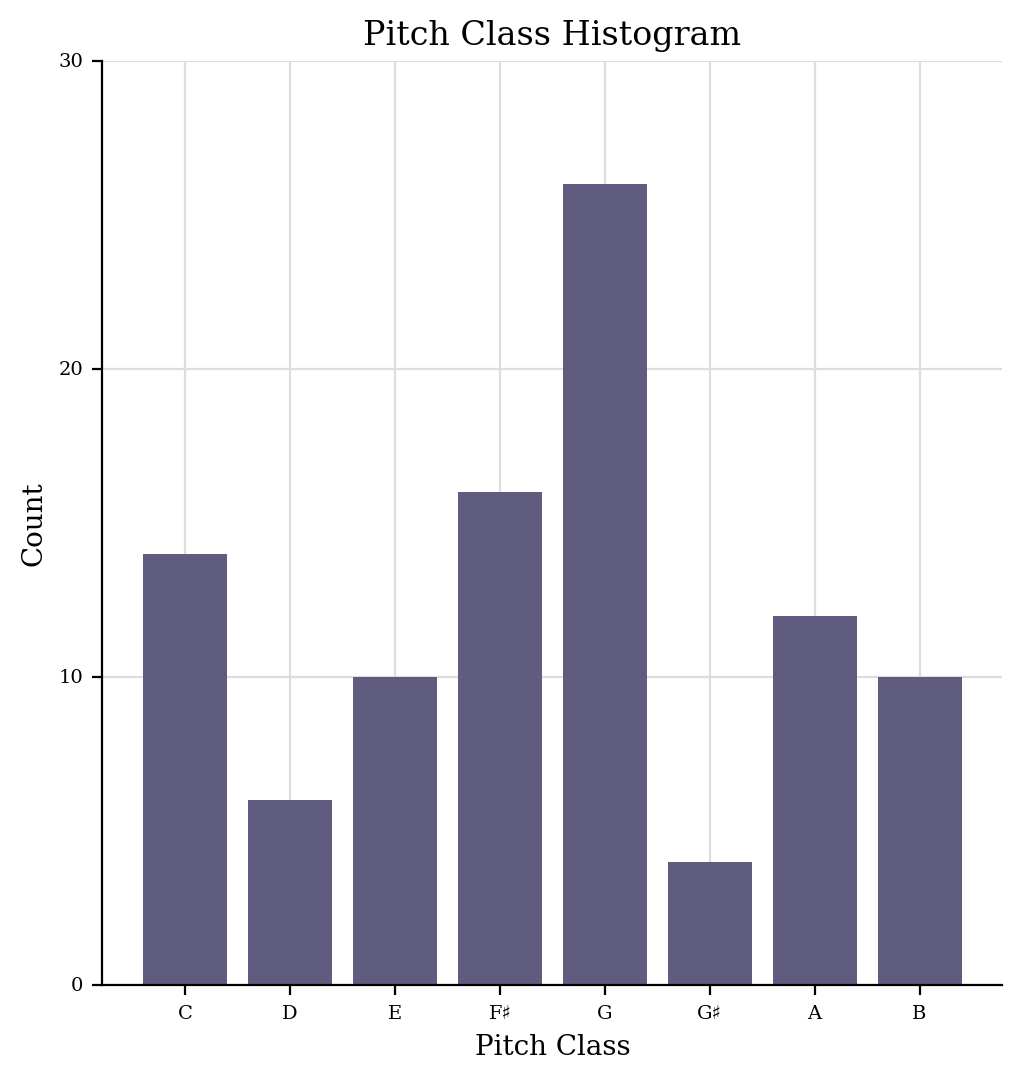

In [53]:
other_abc_string = """
X:1
T:Example
M:4/4
L:1/4
K:G
"I" ^G/2_A/2B/2A/2G/2F/2|G/2A/2B/2A/2G/2F/2|"IV"E3/4F/4G/2E/2|C/2C/2C/2|"V"B,2|"I"G/2A/4G/2F/2E/2|"IV"C/2C/2C/2D/2E/2|"V"F/2B,/2D/2C/2B,/2|"I"G/2G/2G/2A/2|"IV"G/2A/4G/4F/4G/2|"V"F/2G/2F/2D/2|"I"E2|]
"""

examples_stream = stream.Stream()
abc_scores = [abc_string,other_abc_string]
for abc_song in abc_scores:
    parsed_abc_song = converter.parse(abc_song, format='abc')
    examples_stream.insert(examples_stream.highestTime, parsed_abc_song)

examples_stream.plot('histogram', 'pitchClass')

<music21.graph.plot.HistogramPitchSpace for <music21.stream.Stream 0x7ff8e8874d60>>

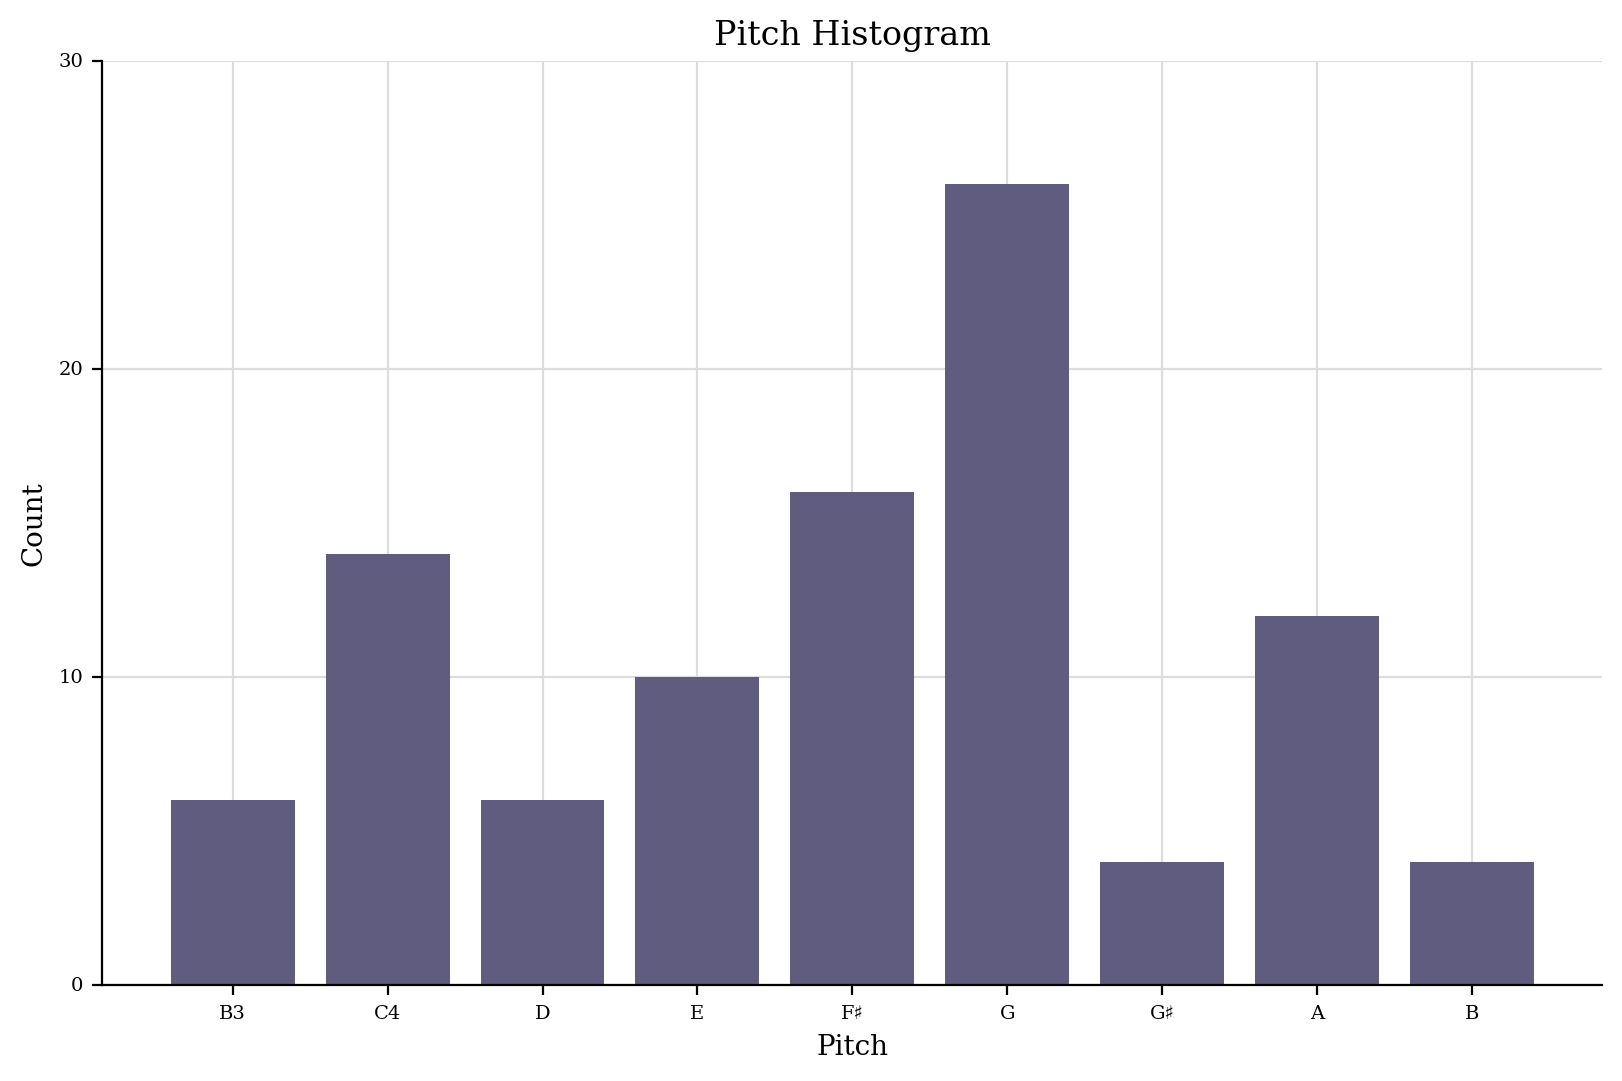

In [42]:
examples_stream.plot('histogram', 'pitch')